In [1]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Initialize parameteres such as learning rate and lambda
eta = 0.3
lambd = 1

#Create Class of Neuron which will contain attributes such as is Activation Value, weights and V, which is the multiplication
#of weights and Activation values for past neurons.
class Neuron:
  def __init__(self, actValue, v, weights):
    self.actValue = actValue
    self.weights = weights
    self.v = v

#Activation Function using sigmoid formula
  def actFunc(self):
    self.actValue = 1 / (1 + math.exp(-lambd * self.v))
  
#Funcions of sets, which will assing values to the Neurons if they previously didn't have them.
  def setV(self, uv):
    self.v = uv
    
  def setAct(self, x):
    self.actValue = x
  
  def setWei(self, weight):
    self.weights = weight

#This function is for calculating V which was mentioned above, it incorporates a Sum and multiplication of weights times
#activation values.
def valu(layer):
  v = []
  for i in range(len(layer[0].weights)):
      sum = 0
      for j in range(len(layer)):
          sum += layer[j].actValue * layer[j].weights[i]
      v.append(sum)
  return v

#Simple formula to calculate Error of predicted output
def error(actY, predY):
  result = actY - predY
  return result

#Function to calculate the Gradients of the Outputs nuerons
def locGradient(self, err):
  grad = lambd * self.actValue * (1 - self.actValue) * err
  return grad

#Function to calculate the Gradients of hidden layer neurons, this function receives the gradients of the outputs
def hidGradient(self, locGrad):
  pt2 = 0
  for i in range(len(self.weights)):
    pt2 += self.weights[i] * locGrad[i]
    
  hidGrad = lambd * (self.actValue) * (1 - self.actValue) * pt2
  return hidGrad

#Function that receives gradients and calulates the new weights for each neuron and update them.
def weightUpdate(self, grad):
  newWeights = []
  for i in range(len(self.weights)):
    w = eta * (grad[i]) * self.actValue
    newWeights.append(w + self.weights[i])
  self.weights = newWeights
  

#Function that incorporates the feedforward process, it involves the function to calculates the V and Activation Value of
#each Neuron.
def forward(neuNet):
    for i in range(1, len(neuNet)):
        valores = valu(neuNet[i - 1])
        for j in range(len(neuNet[i])):
            #If the Neuron is a Bias, there is no need to update the activation value, its needs to stay at 1.
            if neuNet[i][j].v != 'bias':
              neuNet[i][j].setV(valores[j])
              neuNet[i][j].actFunc()  

#Function that incorportates the backward process to update the weights based on the gradients calculated.
#The arguments to pass are the neural network and the two errors, Output1 and 2
def backward(neuNet, errors):
    #Calculate the gradients of the Output layer and stores them in a dictionary for later use.
    grads = {}
    for i in range(len(neuNet[-1])):
        grads["g" + str(i)] = locGradient(neuNet[-1][i], errors[i])
    
    #Calulate the gradients of the Hidden layer.
    hidGrads = {}
    for i in range(len(neuNet) - 2, 0, -1):
        for j in range(len(neuNet[i])):
            hidGrads["hg" + str(j)] = hidGradient(neuNet[i][j], list(grads.values()))
    
    #Update weights of hidden layer to output layer.
    for i in range(len(neuNet[-2])):
      weightUpdate(neuNet[-2][i], list(grads.values()))
    
    #Update weights of input layer to hidden layer.
    for i in range(len(neuNet) - 3, -1, -1):
        for j in range(len(neuNet[i])):
          weightUpdate(neuNet[i][j], list(hidGrads.values()))

#Function to faciliate the process of creating a Neural Network, first three arguments recieve number of Neurons per layer.
#e.g. (2,2,2) would be a Neural Network of two inputs, neurons in hidden layer and two outputs.
#Next two arguments are to indicate if we want a bias in the input and hidden layer, True means we want biases.
#Last argument is to indicate if we to randomize weights or insert previously selected weights.
#The neural network is a list formed of layers and a layer is list formed of objects of Neuron class.
def createNN(inputL, hiddenL, outputL, bias, biash, weights):
    #Create first layer
    layer1 = []
    #Create random weights if False
    if weights == False:
        for i in range(inputL):
            wei = []
            for j in range(hiddenL):
                wei.append(random.random())
            layer1.append(Neuron(None, None, wei))
            
        #Insert a bias if True
        if bias == True:    
            wei = []
            for j in range(hiddenL):
                    wei.append(random.random())
            layer1.append(Neuron(1, 'bias', wei))
    
    #Insert weights that were given as an argument in case weights != False
    else:
        #The list of weights needs to be in correct order because this algorithm will append
        #the weights in order to each Neuron.
        for j in range(inputL):
            wei = []
            wei.extend(weights[:hiddenL])
            layer1.append(Neuron(None, None, wei))
            weights = weights[hiddenL:]
        
        #Insert bias if True
        if bias == True:
            wei = []
            wei.extend(weights[:hiddenL])
            layer1.append(Neuron(1, 'bias', wei))
            weights = weights[hiddenL:]
    
    #The same process repeats itself but for the hidden layer
    layer2 = []
    if weights == False:
        for i in range(hiddenL):
            wei = []
            for j in range(outputL):
                wei.append(random.random())
          
            layer2.append(Neuron(None, None, wei))
            
        if biash == True:
            wei = []
            for j in range(outputL):
                    wei.append(random.random())
            layer2.append(Neuron(1, 'bias', wei))
    else:
        for j in range(hiddenL):
            wei = []
            wei.extend(weights[:outputL])
            layer2.append(Neuron(None, None, wei))
            weights = weights[outputL:]
            
        if biash == True:
            wei = []
            wei.extend(weights[:outputL])
            layer2.append(Neuron(1, 'bias', wei))
            weights = weights[outputL:]
    
    #Create Output layer which is more simple given the fact that it won't have weights or biases. We just create empty Neurons.
    layer3 = []
    for i in range(outputL):
        layer3.append(Neuron(None, None, None))
    
    #Create the list of layers that will compose the Neural Network and return the list.
    neuralNetwork = [layer1, layer2, layer3]
    
    return neuralNetwork

#Function to create a list of the weights of the Neural Network that we want to save for later usage 
# (This will be used for the the Neural Network performs best and we want those weights).
def getWeights(neune):
    weig = []
    for i in range(len(neune) - 1):
        for j in range(len(neune[i])):
            weig.append(neune[i][j].weights)
            
    weigh = np.hstack(weig)
    return list(weigh)

#Function that incorporates and algorithm that will train the Neural Network and see the performance with validation dataset.
#Receives 4 arguments, the Neural Network, the number of epochs, the training dataframe and validation dataframe.
def trainVal(neunet, epochs, train, validate):
    #Set large error that will decrease as the epochs advance.
    counter = 0
    patience = 10
    minError = 1
    for epoch in range(epochs):
      #Create lists where we will store training errors and validation errors
      err = []
      errV = []
      #Start Training
      for i in range(len(train)):
          #Set input values as the ones on the dataframe
          neunet[0][0].setAct(train[0][i])
          neunet[0][1].setAct(train[1][i])
          #Set y1 and y2 values as the ones on the dataframe in order to get the error after Forward step
          y1 = train[2][i]
          y2 = train[3][i]

          #Initialize forwardpass
          forward(neunet)
          #Calculate error based on predicted output and real output for both outputs
          err.append(error(y1, neunet[2][0].actValue))
          err.append(error(y2, neunet[2][1].actValue))
          #Initialize backwards propagation to update weights, we pass both errors to the function
          backward(neunet, err[-2:])
      
      #Once weights have updated, we test performance with validation dataframe. We do the same process
      #up until the backwards propagation.
      for i in range(len(validate)):
          neunet[0][0].setAct(validate[0][i])
          neunet[0][1].setAct(validate[1][i])
          y1 = validate[2][i]
          y2 = validate[3][i]

          forward(neunet)
          #We store the errors in order to get the graph later on.
          errV.append(error(y1, neunet[2][0].actValue))
          errV.append(error(y2, neunet[2][1].actValue))
          
      #Once Training and Validation have finished, we calculate the Root Mean Squared Error for both training and Validation.
      rmse = np.sqrt(np.mean(np.square(err)))
      #We append this rmse to a list created outside the function that will graph the results.
      train_error.append(rmse)
      
      rmseV = np.sqrt(np.mean(np.square(errV)))
      #We append this rmse to a list created outside the function that will graph the results.
      validation_error.append(rmseV)
      
      #If the rmse for the validation epoch is better than the minError, this are the best weights for the moment.
      #We initialized minError as 1, so any result will be better, but minError will update to the actual rmseV.
      if rmseV < minError:
          minError = rmseV
          weights = getWeights(neunet)
          counter = 0
      #In this part we incorporate the early stop function which is a simple algorithm that if the validation error
      #doesn't improve for 5 times in a row, the training stops, else it keeps going through the epochs.
      else:
          counter += 1
          
      if counter > patience:
          break
      
      #This function will return the best weights at the end so we can test the NN in the future.
    return weights

In [2]:
#Start by reading the .csv file
df = pd.read_csv('rocket_data_collection.csv', header=None)
df.shape

(139094, 4)

In [3]:
#Normalize the data.
df[0] = (df[0] - np.min(df[0])) / (np.max(df[0]) - np.min(df[0]))
df[1] = (df[1] - np.min(df[1])) / (np.max(df[1]) - np.min(df[1]))
df[2] = (df[2] - np.min(df[2])) / (np.max(df[2]) - np.min(df[2]))
df[3] = (df[3] - np.min(df[3])) / (np.max(df[3]) - np.min(df[3]))
df.head()

,0,1,2,3
0,0.678891,0.385566,0.418254,0.509416
1,0.678891,0.385566,0.410982,0.511963
2,0.678859,0.385704,0.403710,0.509416
3,0.678859,0.385980,0.396438,0.511963
4,0.678828,0.386394,0.389166,0.509416


In [4]:
#Separate the data into 3 dataframes, Training(70%), Validation(15%) and Testing(15%)
split = np.random.rand(len(df)) < 0.7
train = df[split]
test = df[~split]

split = np.random.rand(len(test)) < 0.5
validate = test[~split]
test = test[split]

#Do a sample of the data so the rows are randomized in order to avoid pattern learning.
train = train.sample(frac=1)
#Reset index of dataframe so it begins with 0 and goes in that order. We repeat for the rest of dataframes.
train = train.reset_index(drop=True)
#Repeat for test and validation dataframes.
test = test.sample(frac=1)
test = test.reset_index(drop=True)
validate = validate.sample(frac=1)
validate = validate.reset_index(drop=True)

# 10 Hidden Neurons

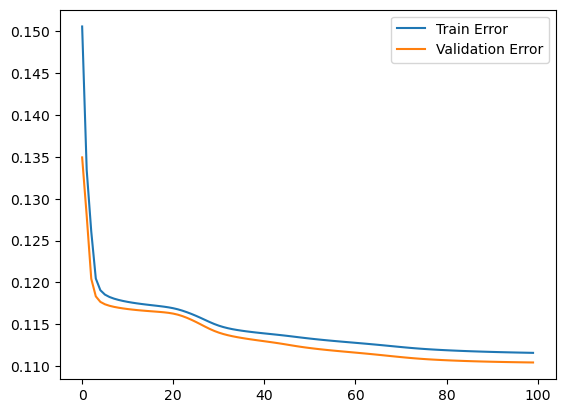

In [5]:
#Create Neural Network of 2 inputs, 10 neurons in the hidden layer and 2 outputs, bias in the input and hidden layer
#and randomize the weights.
nn = createNN(2, 16, 2, bias = True, biash= True, weights = False)

#create list for training erros and validation errors
train_error = []
validation_error = []

#Run the function to train the model and test performance on validation data for 100 epochs, select best weights based
#performance.
weights = trainVal(nn, 100, train, validate)
        
#Graph training error and validation error based on Epochs.
x = list(range(len(train_error)))
y = train_error
y1 = validation_error

plt.plot(x, y, label='Train Error')
plt.plot(x, y1, label='Validation Error')
plt.legend()
plt.show()

# Test

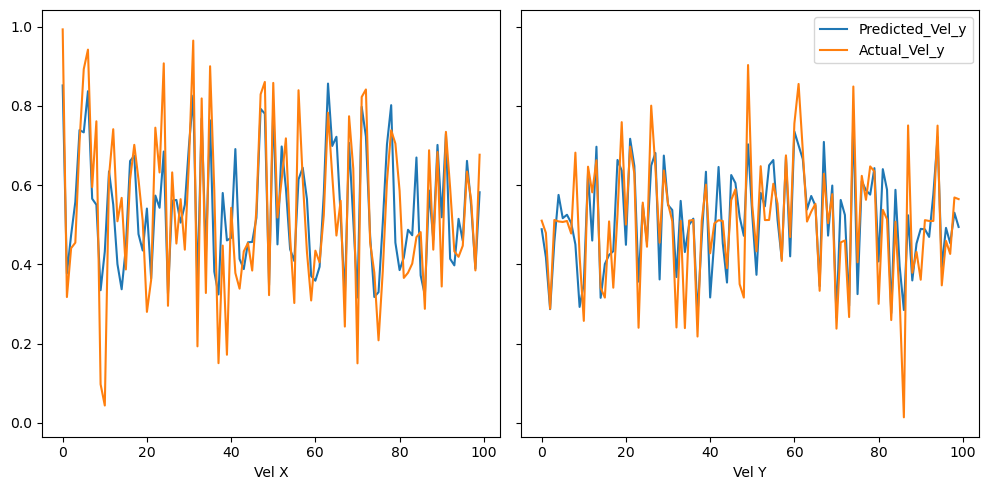

In [6]:
#Once we have our weights, we can create the Neural Network and do the final test which will be done
#with the test dataframe, which is unseen data but the model has the best weights according to our training.
nn = createNN(2, 16, 2, bias = True, biash= True, weights = weights)

#Create list of predicted values of vel_X and vel_y
vel_x = []
vel_y = []
#Create list that will store actual values of vel_x and vel_y
y3 = []
y4 = []
#Test on random 100 hundred values of the test data set in order to visualize the graph better.
test = test.sample(100)
test = test.reset_index(drop=True)
for i in range(len(test)):
    #Set inputs as the ones shown on the test dataset
    nn[0][0].setAct(test[0][i])
    nn[0][1].setAct(test[1][i])

    #Do the forward step to predict values
    forward(nn)
    
    #Append predicted values to their respective lists.
    vel_x.append(nn[2][0].actValue)
    vel_y.append(nn[2][1].actValue)
    y3.append(test[2][i])
    y4.append(test[3][i])

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

x = list(range(len(vel_x)))
# Plot predicted vs actual values for Vel_X
ax1.plot(x, vel_x, label= 'Predicted_Vel_x')
ax1.plot(x, y3, label = 'Actual_Vel_x')
ax1.set_xlabel('Vel X')

# Plot predicted vs actual values for Vel_Y
ax2.plot(x, vel_y, label = 'Predicted_Vel_y')
ax2.plot(x, y4, label = 'Actual_Vel_y')
ax2.set_xlabel('Vel Y')

plt.legend()
plt.tight_layout()
plt.show()

As we can observe, for both Vel X and Vel Y, the predicted values don't follow the actual values perfectly, but they tend to follow the trend, which is good sign that the model did indeed learn. This passes the test in order to test it in the real game and see the performance.